In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()
x_train.shape

(50000, 32, 32, 3)

In [9]:
y_train = y_train.reshape(-1,) # values are array and we want them to not to be a array so reshape
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [10]:
y_test = y_test.reshape(-1,)

In [11]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [12]:
# creating plot sample function:
def plot_sample(x, y, index):
    plt.figure(figsize=(15,2))
    plt.imshow(x[index])
    plt.title(classes[y[index]])

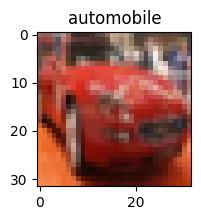

In [14]:
plot_sample(x_train,y_train,5)

now we normalize the data by dividing it to 255 (all values are between 0 and 255), then it will be 0 to 1 range

In [15]:
x_train = x_train / 255
x_test = x_test / 255

# creating CNN model:

In [17]:
cnn = models.Sequential([
    #cnn
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)), # we have 32 filters means we want 32 features and size is 3*3
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    #dense (second part)
    layers.Flatten(), # we don't have to specify the input shape becuase cnn will figure it out
    layers.Dense(64, activation='relu'), # we need less neurons in hidden layer
    layers.Dense(10, activation='softmax') # popular function in cnn network
])

In [20]:
cnn.compile(optimizer='adam',
           loss='sparse_categorical_crossentropy',
           metrics=['accuracy'])

In [21]:
cnn.fit(x_train, y_train, epochs= 5)

Epoch 1/5

1563/1563 [==============================] - 35s 22ms/step - loss: 1.4327 - accuracy: 0.4840
Epoch 2/5
1563/1563 [==============================] - 34s 22ms/step - loss: 1.0805 - accuracy: 0.6201
Epoch 3/5
1563/1563 [==============================] - 34s 22ms/step - loss: 0.9552 - accuracy: 0.6651
Epoch 4/5
1563/1563 [==============================] - 34s 22ms/step - loss: 0.8704 - accuracy: 0.6971
Epoch 5/5
1563/1563 [==============================] - 34s 22ms/step - loss: 0.7999 - accuracy: 0.7221


In [22]:
cnn.evaluate(x_test, y_test)

313/313 [==============================] - 3s 8ms/step - loss: 0.9356 - accuracy: 0.6772


[0.9356476664543152, 0.6772000193595886]

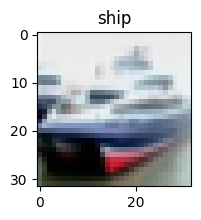

In [23]:
plot_sample(x_test, y_test, 1)

In [26]:
y_pred = cnn.predict(x_test)

313/313 [==============================] - 2s 8ms/step


In [27]:
y_classes = [np.argmax(element) for element in y_pred]

In [28]:
y_classes[:5]

[3, 8, 8, 8, 6]

In [29]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [38]:
def plot_sample_pred(x, y, index):
    plt.figure(figsize=(15,2))
    plt.imshow(x[index])
    plt.title(classes[y[index]])
    plt.xlabel(f'predicted {classes[y_classes[index]]}')

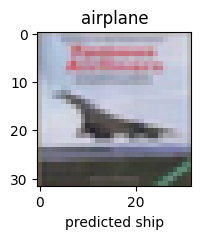

In [39]:
plot_sample_pred(x_test, y_test, 3)